In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.optimize import fsolve

%matplotlib inline

In [16]:
def f(z):
    return l*np.exp(-z*l)

def F(z):
    return quad(f, 0, z)[0]


def foc_c(c):
    val = -r - t * f(c) * np.log(1 - eta - c) - t * (1 - F(c))/(1 - eta - c) + t * f(c) * np.log(1 - c)
    
    return val


def opt_c_old():

    if (-r)/(t * np.log(1-eta)) <= l:
        val = -1/l * np.log(((-r)/(t * np.log(1-eta)))/l)
    else:
        val = 0
    
    return val


def opt_w_ji(c):
    val = max(1/phi * (1 - (phi * t * (1-F(c)))/(mu)), 0)

    return val

# Appendix 3.1

Liquidity Loss on Shock Arrival

In [17]:
l = 1    #\lambda for exponentially distributed shocks
r = 0.01   #r
g = 1     #\gamma

eta = 0.5   #\eta
t = 0.1  #\theta
mu = 0.045   #\mu
phi = 0.4  #\phi



def get_opt_cs_3_1():
    cs = np.linspace(0,1-eta,101)
    foc_vals = [foc_c(c) for c in cs]

    c_opt_new = cs[np.abs(foc_vals) == min(np.abs(foc_vals))][0]
    c_opt_old = opt_c_old()

    return (c_opt_old, c_opt_new)
    
    
    


### Varying $\lambda$ vs Optimal $c_i$'s

/var/folders/2w/xsxzfx8n3ylglwdwg3p_wjcm0000gn/T/ipykernel_14013/366970866.py:9: RuntimeWarning: divide by zero encountered in log
  val = -r - t * f(c) * np.log(1 - eta - c) - t * (1 - F(c))/(1 - eta - c) + t * f(c) * np.log(1 - c)
/var/folders/2w/xsxzfx8n3ylglwdwg3p_wjcm0000gn/T/ipykernel_14013/366970866.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  val = -r - t * f(c) * np.log(1 - eta - c) - t * (1 - F(c))/(1 - eta - c) + t * f(c) * np.log(1 - c)
/var/folders/2w/xsxzfx8n3ylglwdwg3p_wjcm0000gn/T/ipykernel_14013/366970866.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  val = -r - t * f(c) * np.log(1 - eta - c) - t * (1 - F(c))/(1 - eta - c) + t * f(c) * np.log(1 - c)


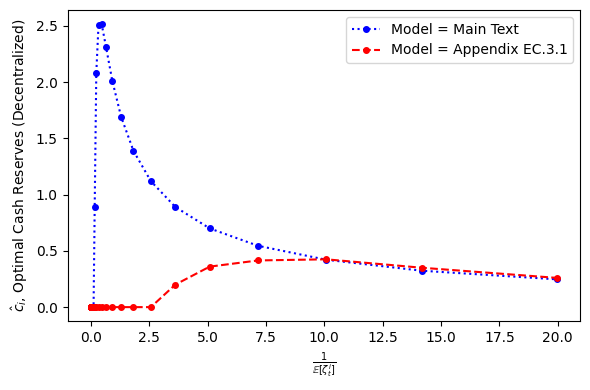

In [25]:
lambdas = np.logspace(-3,1.3,30)

opt_cs_old = np.zeros(len(lambdas))
opt_cs_new = np.zeros(len(lambdas))

for i,l in enumerate(lambdas):
    (opt_cs_old[i], opt_cs_new[i]) = get_opt_cs_3_1()    

fig,ax = plt.subplots(figsize = (6,4))
plt.plot(lambdas, opt_cs_old, 'bo:', markersize = 4,
         label = 'Model = Main Text')
plt.plot(lambdas, opt_cs_new, 'ro--', markersize = 4,
         label = 'Model = Appendix EC.3.1')
#ax.set_xscale('log')
plt.xlabel(r'$\frac{1}{\mathbb{E}[\zeta^i_t]}$')
plt.ylabel(r'$\hat c_i$, Optimal Cash Reserves (Decentralized)')
plt.tight_layout()
plt.legend()
plt.savefig('Fig/Appendix_EC_3_1_Comparison.pdf')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (7,5))
foc_vals = [foc_c(c) for c in cs]
plt.plot(cs, foc_vals, 'b')
plt.plot(cs, [0 for c in cs], 'r:')
plt.xlim([0, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()

# Appendix 3.2

Partially Liquid Risk-free Asset

In [17]:
l = 1    #\lambda for exponentially distributed shocks
r = 0.03   #r
g = 1     #\gamma

eta = 0.3   #\eta
t = 0.1  #\theta
mu = 0.045   #\mu
phi = 0.4  #\phi

a = 0.5   #\alpha

n = 6  #n

# NOTE: Assuming perfect symmetry... Hence only two controls to estimate -- c* and w*


def f_tomax(c, w, c_other, w_other):

    liq = c + a * max(1 - c - (n-1) * w, 0) 
    liq_other = c_other + a * max(1 - c_other - (n-1) * w_other, 0) 

    return (1-c)*r + (n-1)*w*mu + eta*mu/phi + t*(1-F(liq))*np.log(1-eta) + (n-1)*t*(1-F(liq_other))*np.log(1-phi*w)


def best_response_3_2(c_other, w_other):
    
    n_cs = 200
    n_ws = 200
    
    cs = np.linspace(0, 1/2, n_cs)
    ws = np.linspace(0, 1/phi, n_ws, endpoint = False)
    
    vals = np.zeros(shape = (n_cs, n_ws))
    for i,c in enumerate(cs):
        for j,w in enumerate(ws):
            vals[i,j] = f_tomax(c, w, c_other, w_other)

    c_opt_new = cs[np.where(vals == np.max(vals))[0]][0]
    w_opt_new = ws[np.where(vals == np.max(vals))[1]][0]

    return np.array([c_opt_new, w_opt_new])


def obj_fun(x):
    return best_response_3_2(x[0], x[1]) - x


def get_dec_equilibrium():
    # tol = 1e-6

    # c_opt_0 = 0
    # w_opt_0 = 0
    
    # c_opt_prev = c_opt_0
    # w_opt_prev = w_opt_0
    
    # while True:
    #     #print(c_opt_prev, w_opt_prev)
    #     (c_opt_next, w_opt_next) = best_response_3_2(c_opt_prev, w_opt_prev)
        
    #     if np.sqrt((c_opt_next - c_opt_prev)**2 + (w_opt_next - w_opt_prev)**2) <= tol:
    #         break
    
    #     else:
    #         c_opt_prev = c_opt_next
    #         w_opt_prev = w_opt_next

    # return (c_opt_next, w_opt_next)

    return fsolve(obj_fun, [0,0])


In [18]:
opt_c_old()

0.17304237116721316

In [19]:
opt_w_ji(opt_c_old())

0.6308844986285809

In [30]:
alphas = np.linspace(0,1,30, endpoint = True)

opt_cs_old = np.ones(len(alphas))*opt_c_old()

opt_cs_new = np.zeros(len(alphas))
opt_ws_new = np.zeros(len(alphas))

for i, a in enumerate(alphas):
    (opt_cs_new[i], opt_ws_new[i]) = get_dec_equilibrium() 
    print(a.round(2), opt_cs_new[i].round(2), opt_ws_new[i].round(2))

0.0 0.17 0.64
0.03 0.17 0.64
0.07 0.17 0.64
0.1 0.17 0.64
0.14 0.17 0.64
0.17 0.17 0.64
0.21 0.17 0.64
0.24 0.17 0.64
0.28 0.17 0.64
0.31 0.17 0.64
0.34 0.17 0.64
0.38 0.17 0.64
0.41 0.17 0.64
0.45 0.17 0.64
0.48 0.17 0.64
0.52 0.17 0.64
0.55 0.17 0.64
0.59 0.17 0.64
0.62 0.17 0.64
0.66 0.17 0.64
0.69 0.17 0.64
0.72 0.17 0.64
0.76 0.17 0.64
0.79 0.17 0.64
0.83 0.17 0.64


/var/folders/2w/xsxzfx8n3ylglwdwg3p_wjcm0000gn/T/ipykernel_91882/3550025183.py:70: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(obj_fun, [0,0])


0.86 -0.02 0.16
0.9 -0.02 0.16
0.93 -0.01 0.16
0.97 -0.02 0.16
1.0 -0.02 0.16


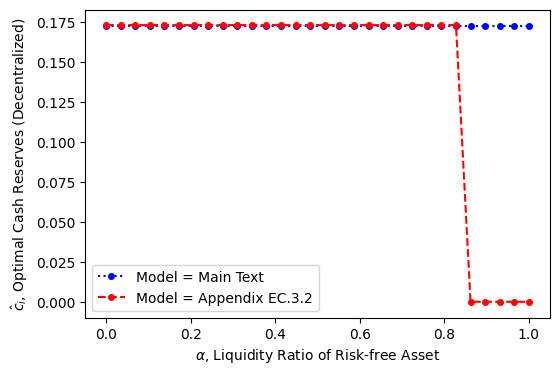

In [38]:
fig,ax = plt.subplots(figsize = (6,4))
plt.plot(alphas, opt_cs_old, 'bo:', markersize = 4,
         label = 'Model = Main Text')
plt.plot(alphas, np.maximum(opt_cs_new, 0), 'ro--', markersize = 4,
         label = 'Model = Appendix EC.3.2')
#ax.set_xscale('log')
plt.xlabel(r'$\alpha$, Liquidity Ratio of Risk-free Asset')
plt.ylabel(r'$\hat c_i$, Optimal Cash Reserves (Decentralized)')
plt.legend()
plt.savefig('Fig/Appendix_EC_3_2_Comparison_n_6.pdf')
plt.ylim([-0.01, 0.183])
plt.show()

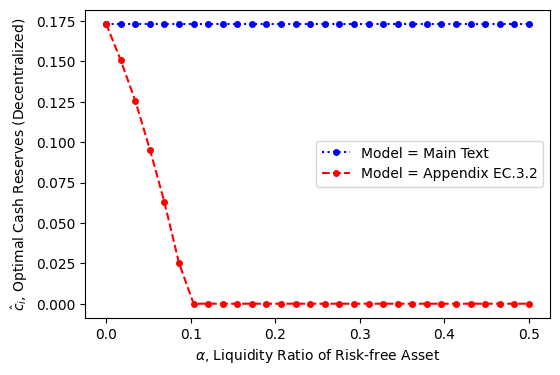

In [8]:
fig,ax = plt.subplots(figsize = (6,4))
plt.plot(alphas, opt_cs_old, 'bo:', markersize = 4,
         label = 'Model = Main Text')
plt.plot(alphas, opt_cs_new, 'ro--', markersize = 4,
         label = 'Model = Appendix EC.3.2')
#ax.set_xscale('log')
plt.xlabel(r'$\alpha$, Liquidity Ratio of Risk-free Asset')
plt.ylabel(r'$\hat c_i$, Optimal Cash Reserves (Decentralized)')
plt.legend()
plt.savefig('Fig/Appendix_EC_3_2_Comparison_n_2.pdf')
plt.show()

# Appendix 3.3

Allowing control of $\eta_i$

In [3]:
l = 1    #\lambda for exponentially distributed shocks
r = 0.013   #r
g = 1     #\gamma

eta = 0.5   #\eta (for ref. point when fixed)

t = 0.1  #\theta
mu = 0.045   #\mu
phi = 0.8  #\phi


def opt_eta(c):
    return max(1 - (phi*t*(1-F(c)))/(mu), 0)

def get_obj_val(c, eta = None):
    if eta is None:
        eta_given_c = opt_eta(c)
    else:
        eta_given_c = eta
    
    return (1-c)*r + eta_given_c*mu/phi + t*(1-F(c))*np.log(1-eta_given_c)
    

In [4]:
cs = np.linspace(0,4,100)

etas = []
vals = []
old_vals = []

for c in cs:
    etas.append(opt_eta(c))
    vals.append(get_obj_val(c))
    old_vals.append(get_obj_val(c, eta = eta))
    


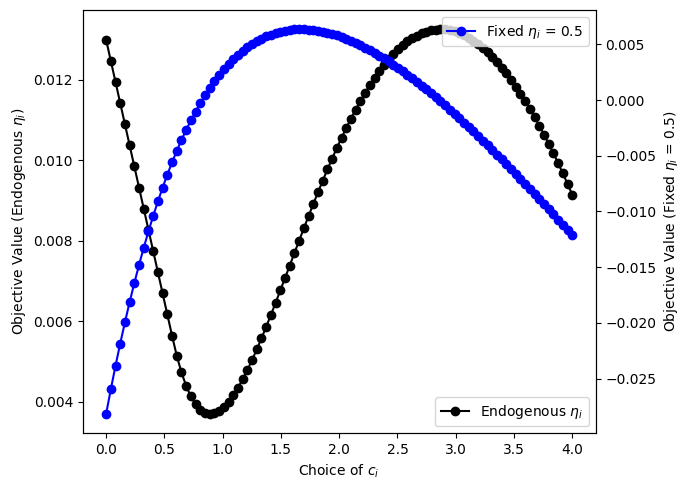

In [26]:
fig, ax1 = plt.subplots(figsize = (7,5))

ax1.plot(cs, vals, 'k-o', label = r'Endogenous $\eta_i$')
ax1.set_xlabel(r'Choice of $c_i$')
ax1.set_ylabel(r'Objective Value (Endogenous $\eta_i$)')
plt.legend(loc=0)

ax2 = ax1.twinx()

ax2.plot(cs, old_vals, 'b-o', label = r'Fixed $\eta_i$ = '+str(eta))
ax2.set_ylabel(r'Objective Value (Fixed $\eta_i$ = '+str(eta)+')')
plt.legend(loc=0)

plt.tight_layout()

plt.savefig('Fig/Appendix_EC_3_3_Endog_Eta_Obj.pdf')
plt.show()
